# Build a Decision Tree Classifier

In [54]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [55]:
# Load the iris datasets
iris = datasets.load_iris()
print(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [56]:
X = iris.data
y = iris.target
print(iris.feature_names)
print(X[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [57]:
print(iris.target_names)
print(y)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [58]:
from IPython.display import Image
Image(url="http://upload.wikimedia.org/wikipedia/commons/e/ea/Anderson%27s_Iris_data_set.png", width=600)

In [59]:
# Build a simple model
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [60]:
# Make predictions
expected = iris.target
predicted = model.predict(iris.data)

In [61]:
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.50      1.00      0.67        50
          2       0.00      0.00      0.00        50

avg / total       0.50      0.67      0.56       150

Confusion matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


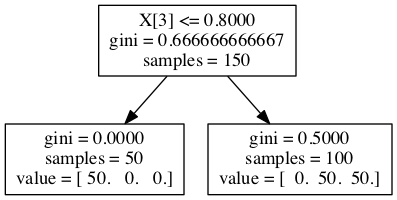

In [62]:
with open("iris_simple.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)
! dot -Tpng iris_simple.dot -o iris_simple.png
Image("iris_simple.png")

In [63]:
# Fit a model to the data
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [64]:
# Make predictions
expected = iris.target
predicted = model.predict(iris.data)

In [65]:
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



In [66]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


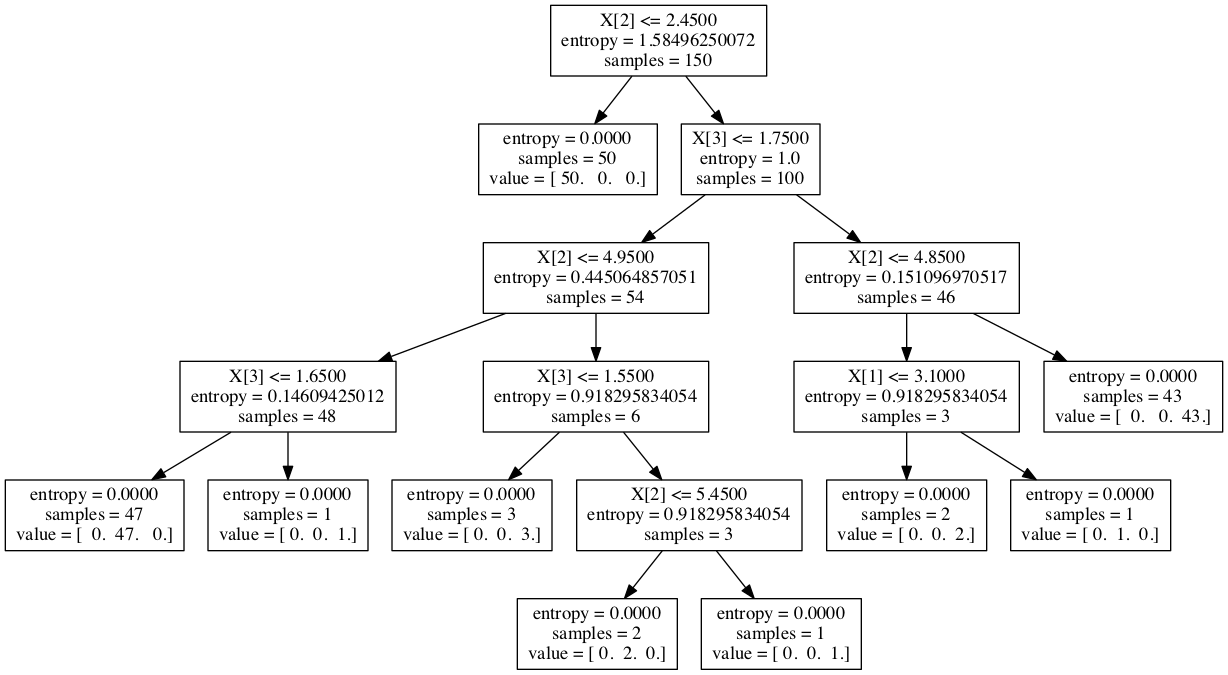

In [67]:
with open("iris_complex.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)
! dot -Tpng iris_complex.dot -o iris_complex.png
Image("iris_complex.png")

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)
# Make predictions
expected = iris.target
predicted = rf.predict(iris.data)
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

Confusion matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [69]:
print(iris.feature_names)
print(rf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 0.11896532  0.0231668   0.36804744  0.48982043]
